In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('../평균_표준편차.xlsx', sheet_name=4, header=None)
df.drop(columns=[0], inplace=True)

cluster = ['군집0', '군집1', '군집2', '군집3']
sectors = list(pd.unique(df[2]))

df[1].value_counts()

군집0      1
66588    1
군집1      1
38340    1
군집2      1
7548     1
군집3      1
53096    1
Name: 1, dtype: int64

In [14]:
df.loc[df[1] == 66588, 1] = np.nan
df.loc[df[1] == 38340, 1] = np.nan
df.loc[df[1] == 7548, 1] = np.nan
df.loc[df[1] == 53096, 1] = np.nan

In [15]:
df = df.fillna(method='ffill')

df = df.astype({5:'string'})
df.info()

df[6] = df[2] + '_risky_' + df[5]
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       20 non-null     object 
 1   2       20 non-null     object 
 2   3       20 non-null     int64  
 3   4       20 non-null     float64
 4   5       20 non-null     string 
dtypes: float64(1), int64(1), object(2), string(1)
memory usage: 932.0+ bytes


,1,2,3,4,5,6
0,군집0,골목상권,1600,0.024028,0,골목상권_risky_0
1,군집0,골목상권,544,0.008170,1,골목상권_risky_1
2,군집0,발달상권,51956,0.780261,0,발달상권_risky_0
3,군집0,발달상권,11852,0.177990,1,발달상권_risky_1
4,군집0,전통시장,460,0.006908,0,전통시장_risky_0
5,군집0,전통시장,176,0.002643,1,전통시장_risky_1
6,군집1,골목상권,6388,0.166615,0,골목상권_risky_0
7,군집1,골목상권,1336,0.034846,1,골목상권_risky_1
8,군집1,발달상권,23864,0.622431,0,발달상권_risky_0
9,군집1,발달상권,5880,0.153365,1,발달상권_risky_1


In [26]:
def visualize(cluster_group):
    cluster = df.loc[(df[1] == cluster_group)]
    palette = sns.color_palette("pastel")
    plt.rc('font', family='Malgun Gothic')
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.figure(figsize=(25, 15))
    
    plt.subplot(1,3,1)
    sizes = cluster[3]
    labels = cluster[6]
    plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=0, colors=palette)
    plt.title(f'{cluster_group}의 전체')
    
    plt.subplot(1,3,2)
    sizes = cluster.loc[df[5] == '0'][3]
    labels = cluster.loc[df[5] == '0'][2]
    plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=0, colors=palette)
    plt.title(f'{cluster_group}의 비 경영위기')
    
    plt.subplot(1,3,3)
    sizes = cluster.loc[df[5] == '1'][3]
    labels = cluster.loc[df[5] == '1'][2]
    plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=0, colors=palette)
    plt.title(f'{cluster_group}의 경영위기')
    
    plt.tight_layout()
    
    dir_path = f'./상권_구분_코드_명_시각화'
    
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    plt.savefig(f'./상권_구분_코드_명_시각화/{cluster_group}의 상권 구분 코드별 분포.png')
    
    plt.show()    
    

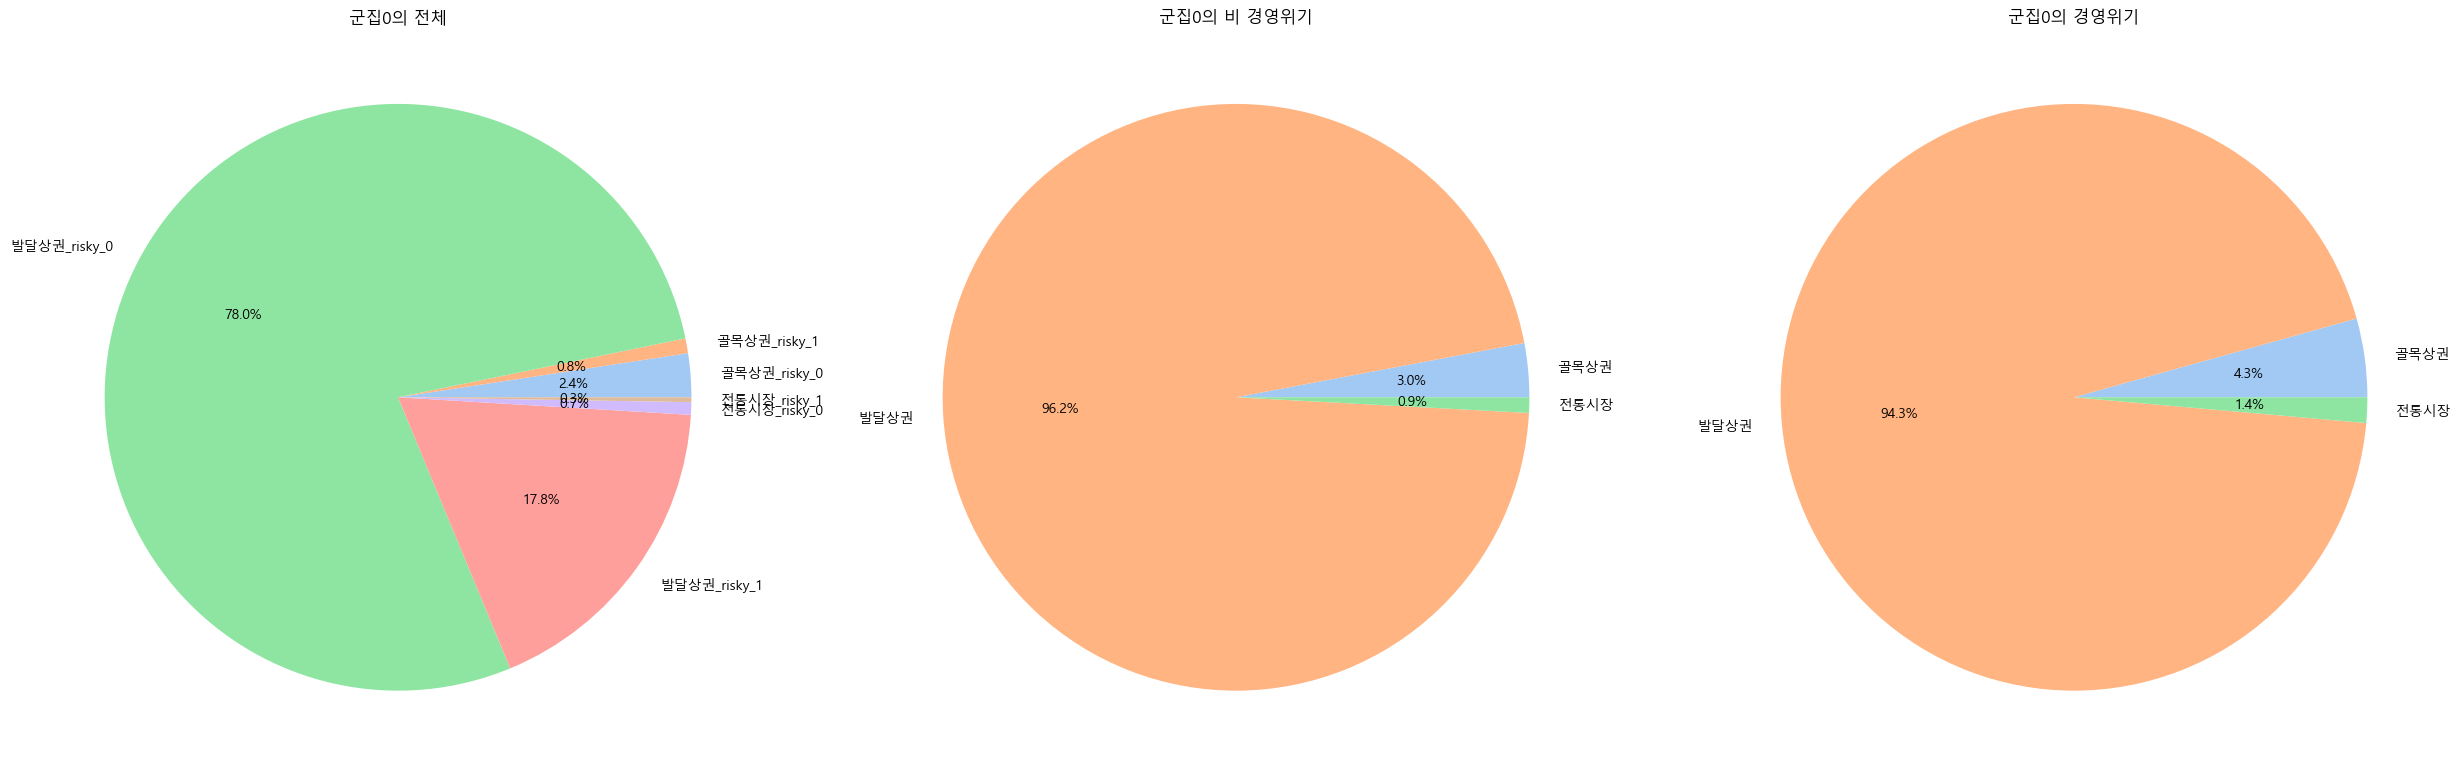

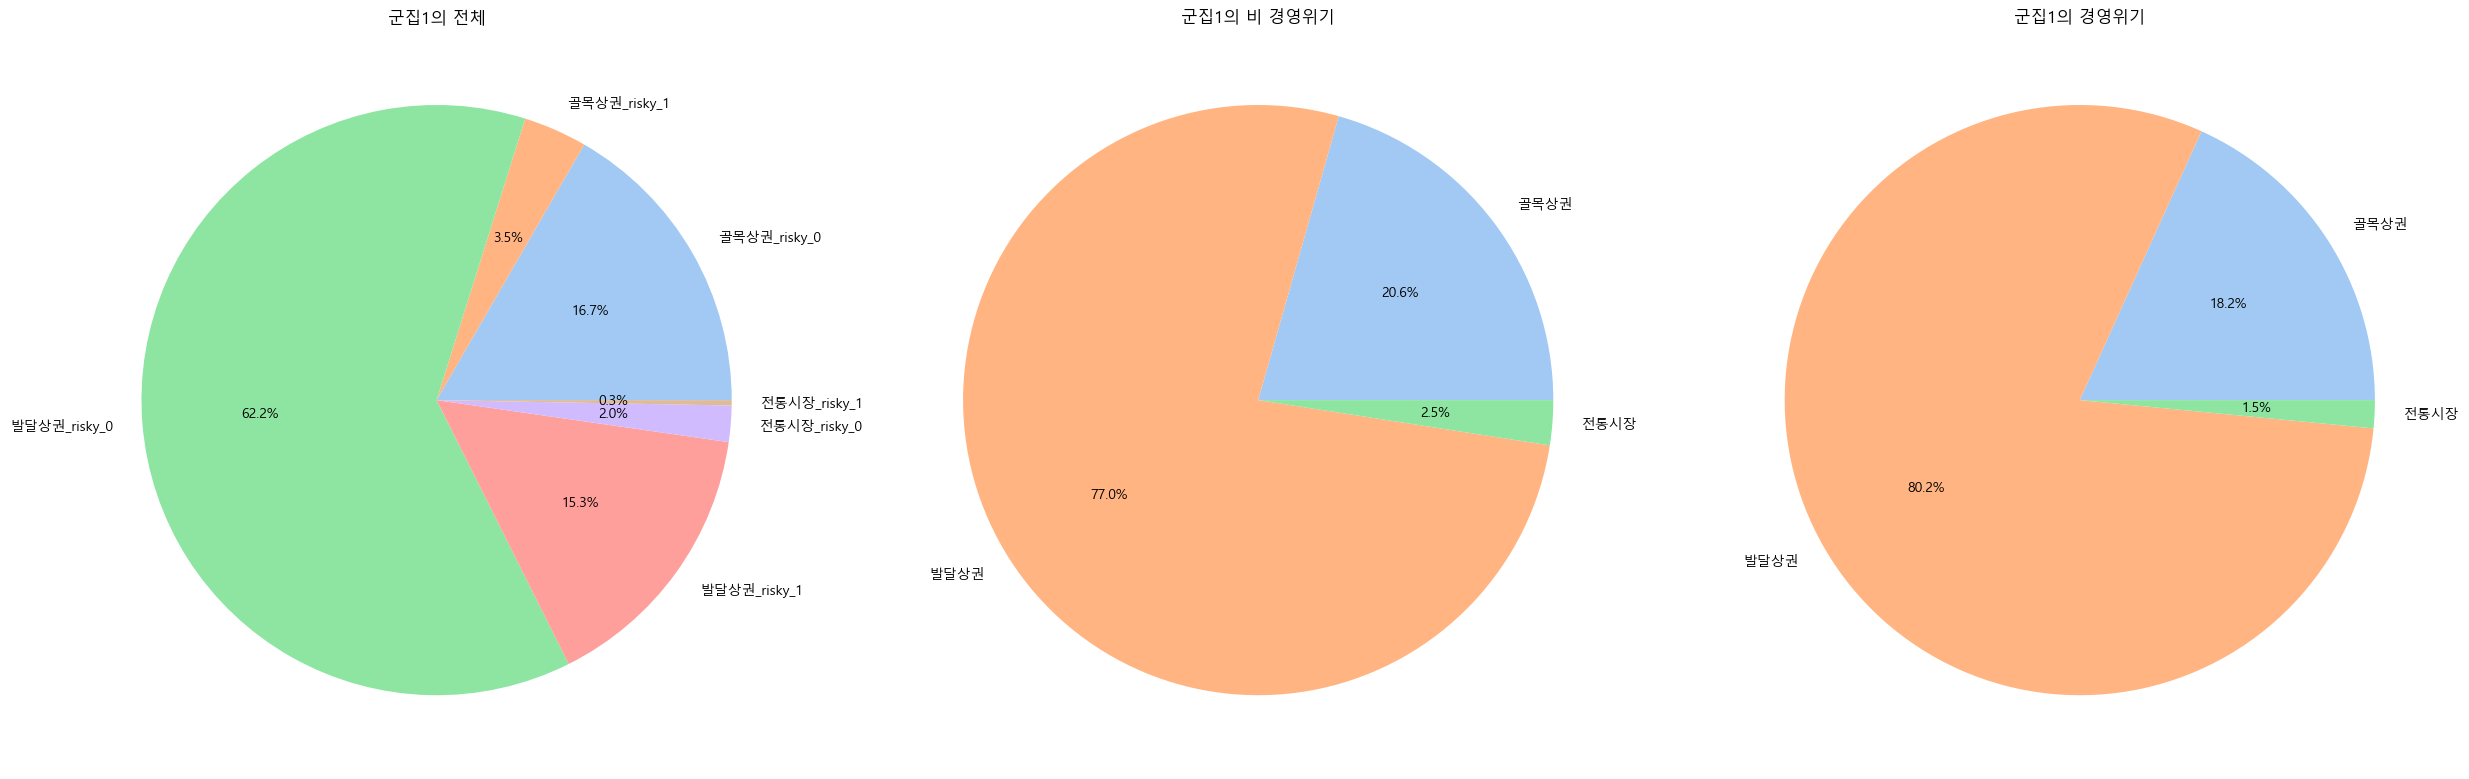

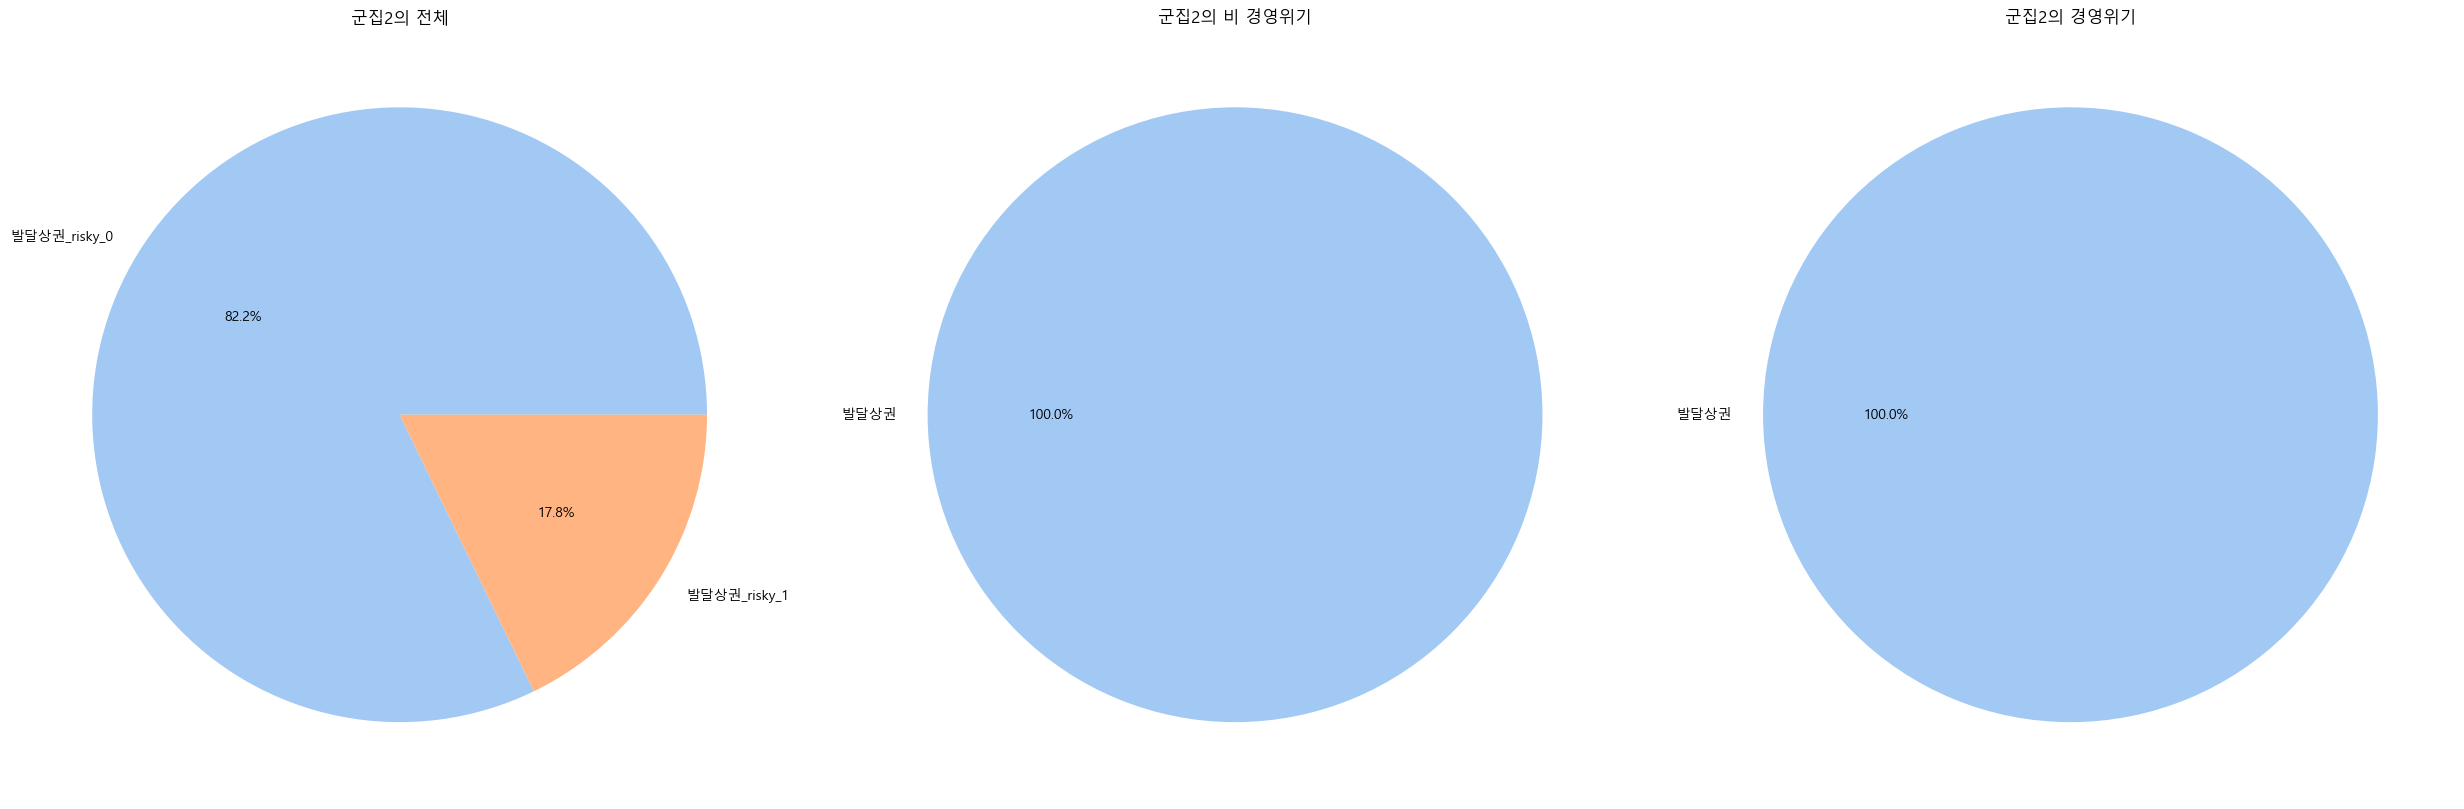

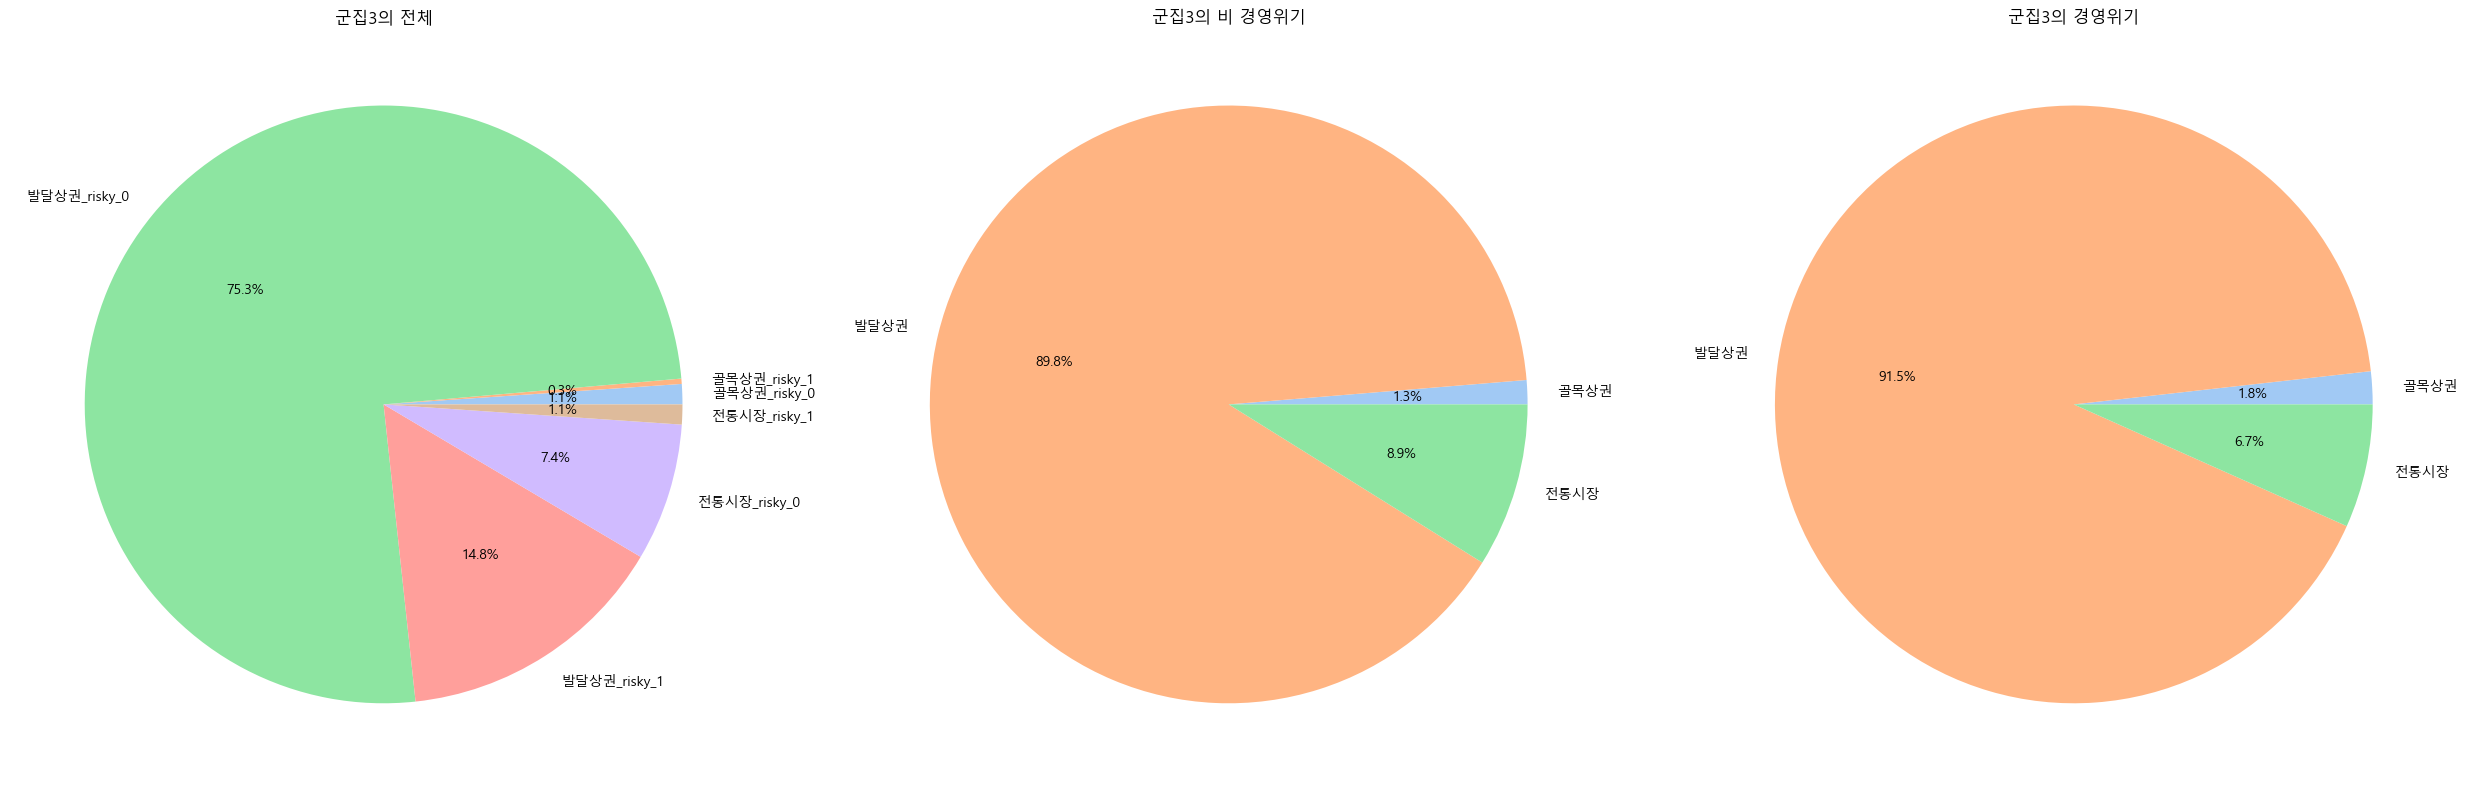

In [27]:
clusters = ['군집0', '군집1', '군집2', '군집3']

for cluster in clusters:
    visualize(cluster)